In [1]:
import pandas as pd
import nltk
from keybert import KeyBERT
import string
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Load data

In [3]:
data = pd.read_csv('./UoY.csv')

### Department statistics

In [4]:
department_list = data['Department'].unique()
department_number = len(department_list)
department_avg = {}
total = 0
for department in department_list:
    count = len(data[data['Department'] == department])
    department_avg[department] = count
    total += count
print("average cource per department:", total / department_number)
department_avg

average cource per department: 91.40625


{'Archaeology': 129,
 'Biology': 62,
 'Centre for 18th Century Studies': 14,
 'Centre for Lifelong Learning': 63,
 'Centre for Medieval Studies': 30,
 "Centre for Women's Studies": 11,
 'Chemistry': 61,
 'Computer Science': 97,
 'Economics and Related Studies': 117,
 'Education': 107,
 'Electronic Engineering': 122,
 'English and Related Literature': 182,
 'Environment and Geography': 88,
 'Health Sciences': 128,
 'History': 129,
 'History of Art': 73,
 'Language and Linguistic Science': 270,
 'Mathematics': 137,
 'Music': 140,
 'Natural Sciences': 5,
 'Philosophy': 123,
 'Philosophy, Politics and Economics': 11,
 'Physics': 84,
 'Politics': 121,
 'Psychology': 89,
 'Research Centre for Social Sciences': 6,
 'School of Social and Political Sciences': 7,
 'Social Policy and Social Work': 105,
 'Sociology': 65,
 'The York Law School': 93,
 'The York Management School': 140,
 'Theatre, Film, Television and Interactive Media': 116}

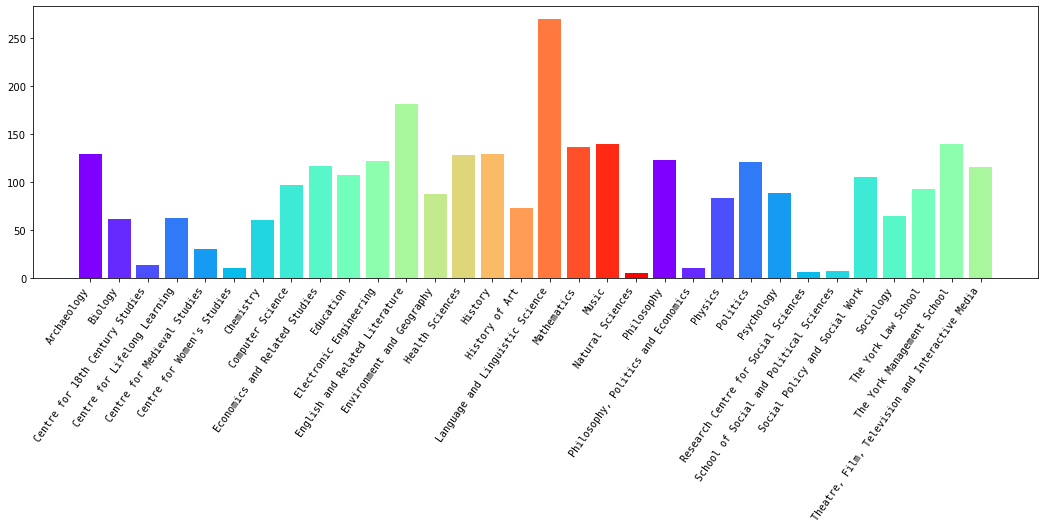

In [5]:
names = list(department_avg.keys())
values = list(department_avg.values())

f, ax = plt.subplots(figsize=(18,5))
color = plt.cm.rainbow(np.linspace(0, 1, 20))
plt.bar(range(len(department_avg)), values, tick_label=names, color = color, width=0.8)
plt.xticks([*range(0, len(names))], names,  ha='right', rotation=55, fontsize=10, fontname='monospace')

plt.show()

### combine columns

In [6]:
import re

data['combined'] = data['Outcome'].astype(str) + ' ' + data['Objective'].astype(str) + ' ' + data['Description'].astype(str)

for i, row in data.iterrows(): # add prequisites and course title
    data.at[i,'combined'] += ' ' + row['Course title'].rpartition('-')[0]
    pre = row['Prerequisite']
    if (isinstance(pre, str)):
        data.at[i,'combined'] += ' ' + re.sub(r'\([\w]{3}[0-9]{5}[\w]\)', ' ', pre)
        
data = data.replace('nan',' ', regex=True)
data = data.replace('\n',' ', regex=True)
data = data.replace('\r',' ', regex=True)
data = data.replace('  ',' ', regex=True)

In [7]:
# data = data[data['combined'].notna()]
len(data[data['combined'].isna()])

0

### Preprocess

In [8]:
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.PorterStemmer()
words_set = set()
data['preprocessed'] = ""
total_rows = data.shape[0]

for index, row in data.iterrows():
    combined = row['combined']
    combined = combined.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokenized_doc = nltk.word_tokenize(combined)
    tokenized_doc = [word for word in tokenized_doc if word not in stopwords.words('english')]
    lemmatized_list = []
    for token in tokenized_doc:
        stemmed_token = stemmer.stem(token)
        lemmatized_token = lemmatizer.lemmatize(stemmed_token)
        lemmatized_list.append(lemmatized_token)
        words_set.add(lemmatized_token)

    data.at[index, 'preprocessed'] = ' '.join(map(str, lemmatized_list))
    print('Lesson {} from {} preprocessed'.format(index, total_rows))

data.to_csv('./preprocess.csv')

Lesson 0 from 2925 preprocessed
Lesson 1 from 2925 preprocessed
Lesson 2 from 2925 preprocessed
Lesson 3 from 2925 preprocessed
Lesson 4 from 2925 preprocessed
Lesson 5 from 2925 preprocessed
Lesson 6 from 2925 preprocessed
Lesson 7 from 2925 preprocessed
Lesson 8 from 2925 preprocessed
Lesson 9 from 2925 preprocessed
Lesson 10 from 2925 preprocessed
Lesson 11 from 2925 preprocessed
Lesson 12 from 2925 preprocessed
Lesson 13 from 2925 preprocessed
Lesson 14 from 2925 preprocessed
Lesson 15 from 2925 preprocessed
Lesson 16 from 2925 preprocessed
Lesson 17 from 2925 preprocessed
Lesson 18 from 2925 preprocessed
Lesson 19 from 2925 preprocessed
Lesson 20 from 2925 preprocessed
Lesson 21 from 2925 preprocessed
Lesson 22 from 2925 preprocessed
Lesson 23 from 2925 preprocessed
Lesson 24 from 2925 preprocessed
Lesson 25 from 2925 preprocessed
Lesson 26 from 2925 preprocessed
Lesson 27 from 2925 preprocessed
Lesson 28 from 2925 preprocessed
Lesson 29 from 2925 preprocessed
Lesson 30 from 2925 

### keyword extraction

In [9]:
kw_model = KeyBERT()

In [10]:
data = pd.read_csv('./preprocess.csv')
data['keywords'] = ""
total_rows = data.shape[0]
for index, row in data.iterrows():
    keywords = kw_model.extract_keywords(data.at[index, 'preprocessed'], top_n=15, min_df=2)
    print('Lesson {} from {} keywords extracted: {}'.format(index, total_rows, len(keywords)))
    data.at[index, 'keywords'] = keywords
data.to_csv('./with_keywords.csv')

Lesson 0 from 2925 keywords extracted: 15
Lesson 1 from 2925 keywords extracted: 15
Lesson 2 from 2925 keywords extracted: 15
Lesson 3 from 2925 keywords extracted: 15
Lesson 4 from 2925 keywords extracted: 15
Lesson 5 from 2925 keywords extracted: 15
Lesson 6 from 2925 keywords extracted: 15
Lesson 7 from 2925 keywords extracted: 15
Lesson 8 from 2925 keywords extracted: 15
Lesson 9 from 2925 keywords extracted: 15
Lesson 10 from 2925 keywords extracted: 9
Lesson 11 from 2925 keywords extracted: 15
Lesson 12 from 2925 keywords extracted: 15
Lesson 13 from 2925 keywords extracted: 15
Lesson 14 from 2925 keywords extracted: 15
Lesson 15 from 2925 keywords extracted: 15
Lesson 16 from 2925 keywords extracted: 15
Lesson 17 from 2925 keywords extracted: 15
Lesson 18 from 2925 keywords extracted: 15
Lesson 19 from 2925 keywords extracted: 15
Lesson 20 from 2925 keywords extracted: 15
Lesson 21 from 2925 keywords extracted: 15
Lesson 22 from 2925 keywords extracted: 15
Lesson 23 from 2925 ke

### create keywords dataframe

In [ ]:
data = pd.read_csv('./with_keywords.csv')
df = list()
for index, row in data.iterrows():
    keywords = row['keywords']
    if isinstance(keywords, str):
        keywords = eval(keywords)
    keywords = [k[0] for k in keywords]
    df.append(keywords)
    
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)#.drop('nan', axis=1)
df.to_csv('./keywords.csv', index=False)

In [16]:
df = pd.read_csv('./keywords.csv')

In [17]:
hist = {}
for column in df:
    hist[column] = len(df[df[column] == True])
hist = Counter(hist).most_common(20)
hist = dict(hist)

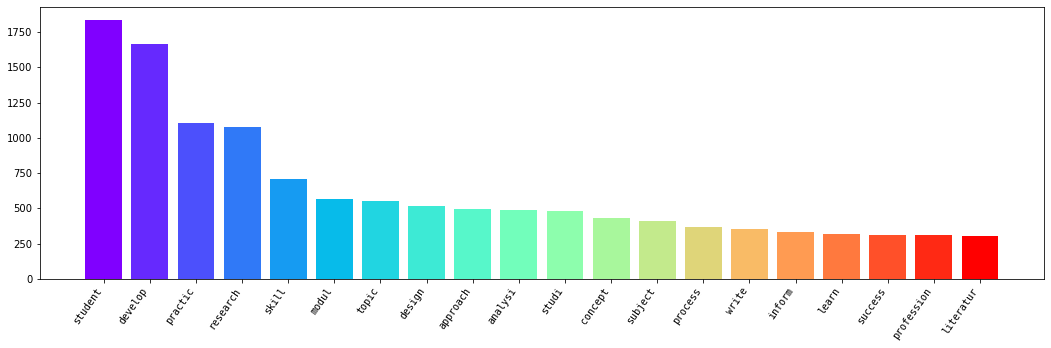

In [18]:
names = list(hist.keys())
values = list(hist.values())

f, ax = plt.subplots(figsize=(18,5))
color = plt.cm.rainbow(np.linspace(0, 1, 20))
plt.bar(range(len(hist)), values, tick_label=names, color = color, width=0.8)
plt.xticks([*range(0, len(names))], names,  ha='right', rotation=55, fontsize=10, fontname='monospace')
plt.show()

### find frequent patterns

In [19]:
# 0.05 = 150 / 3000
freq_patterns = apriori(df, min_support=0.05, use_colnames=True)
freq_patterns.to_csv('./frequent_patterns.csv')
freq_patterns.shape

(222, 2)

### Associatio rules

In [20]:
rules = association_rules(freq_patterns, metric='confidence', min_threshold=0.8)
print(rules)
rules.to_csv('./rules.csv')

                            antecedents consequents  antecedent support  \
0                              (inform)   (current)            0.112821   
1                             (current)    (inform)            0.095043   
2                             (unavail)   (current)            0.092650   
3                             (current)   (unavail)            0.095043   
4                               (learn)   (develop)            0.108034   
..                                  ...         ...                 ...   
89         (research, develop, subject)   (student)            0.057778   
90           (research, develop, topic)   (student)            0.074188   
91           (research, skill, practic)   (student)            0.072821   
92  (research, skill, practic, student)   (develop)            0.059487   
93  (research, skill, develop, practic)   (student)            0.064274   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.095